### Semi-Synthetic Notebook

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

from data_dir import data_dir

pprint(data_dir)

('C:\\Users\\aa2301\\OneDrive - University of Cambridge\\PhD\\Projects\\CVQKD '
 'Postselection and Security\\QPT_for_CVQKD\\data\\alice and bob x,p values\\')


In [5]:
# Load data
alice_q = np.loadtxt(data_dir + "alice_x_final_15km.txt")
alice_p = np.loadtxt(data_dir + "alice_p_final_15km.txt")
bob_q = np.loadtxt(data_dir + "bob_x_final_15km.txt")
bob_p = np.loadtxt(data_dir + "bob_p_final_15km.txt")

# Create a DataFrame
df = pd.DataFrame({
    'alice_q': alice_q,
    'alice_p': alice_p,
    'bob_q': bob_q,
    'bob_p': bob_p
})

print(df.describe())


             alice_q        alice_p          bob_q          bob_p
count  500000.000000  500000.000000  500000.000000  500000.000000
mean        0.000535      -0.002957      36.445318      -3.860399
std         1.457955       1.456555     124.946882     131.652477
min        -7.357238      -7.238607    -502.045815    -511.485008
25%        -0.982236      -0.985516     -14.141690     -67.557220
50%         0.000822      -0.002166      45.951842     -15.307484
75%         0.984474       0.981508      87.743154      48.216095
max         6.664468       7.118128     527.323757     497.502447


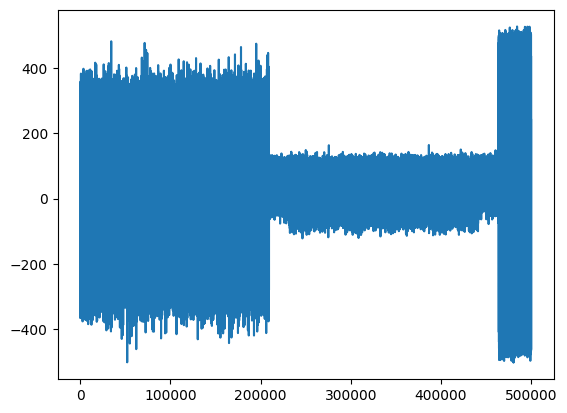

In [6]:
plt.plot(bob_q)
plt.show()

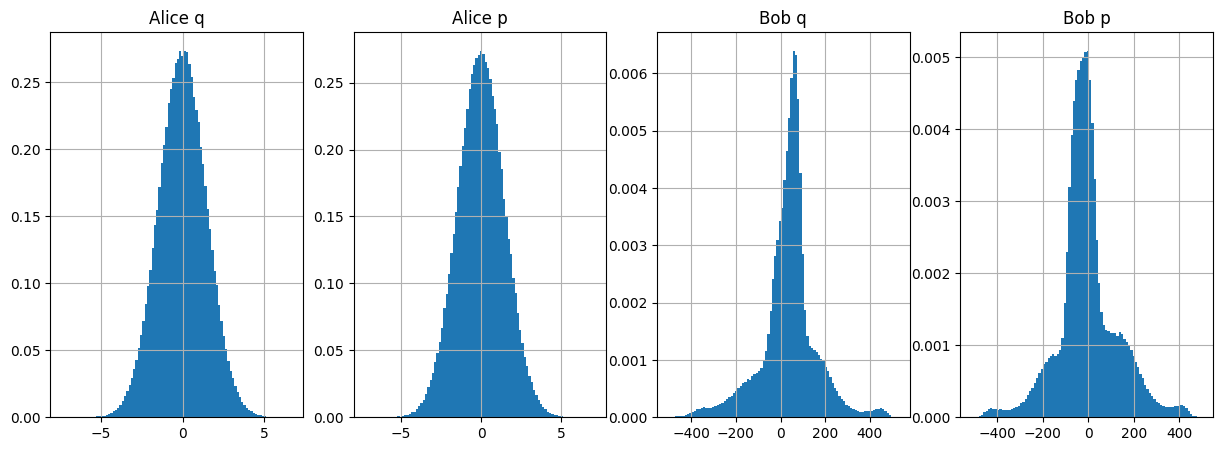

In [3]:
# Plot a normalized PMF of each column, side by side

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
df['alice_q'].hist(ax=axs[0], bins=100, density=True)
axs[0].set_title('Alice q')
df['alice_p'].hist(ax=axs[1], bins=100, density=True)
axs[1].set_title('Alice p')
df['bob_q'].hist(ax=axs[2], bins=100, density=True)
axs[2].set_title('Bob q')
df['bob_p'].hist(ax=axs[3], bins=100, density=True)
axs[3].set_title('Bob p')
plt.show()


### Synthetic Bob Data 

For now, from here, as Bob's $q$ and $p$ values are highly non-Gaussian, I think it's best to proceed with synthetic data, derived from Alice's real $q$ and $p$ values.

That is, given a (marginalised) covariance matrix
$$
\Sigma = \begin{pmatrix}
a & c \\
c & b
\end{pmatrix}
$$
and given Alice's data $\{x\} = \{q\} \cup \{p\}$ which has variance $a$, can we construct synthetic data to create $\Sigma$?

To do this, model Bob's synthetic data $Y$ as $$Y = kX + Z$$ where $Z$ is additive random (Gaussian) noise. By some algebra, we find $\text{Cov}(X, Y) = k \sigma_X^2 + \text{Cov}(X, Z)$ $(= 0)$, therefore $k = c / a$. Following a similar analysis, we find $$\sigma_Z^2 = b - \frac{c^2}{a}$$ such that $$ Z \sim \mathcal{N}(0, b - \frac{c^2}{a}) $$. 

In terms of experimental parameters,
$$ a = V_\text{mod} + 1 $$
$$ b = (TV_\text{mod} + 1 + \xi) $$
$$ c = \sqrt{T(a^2 - 1)} $$

In [11]:
# Unify q and p values in to x by concatenating them.
x_data = np.concatenate((df["alice_q"].values, df["alice_p"].values))

a = np.var(x_data)

v_mod = a - 1.0

T = 0.5 # TODO: translate to a distance
xi = 0.0 # TODO: use an experimentally derived value

b = (T * v_mod) + 1.0 + xi
c = np.sqrt(T*(a**2 - 1.0))

pprint((a, b, c))


(2.123591605126933, 1.5617958025634664, 1.3246964379369304)
